# RIB 2020 Homework 6

## a. Deterministic stable steady states 

The steady state can be obtained by equating $\frac{dx}{dt}$ to 0, i.e.  

$$\frac{v_0 + v_1 K_1 K_2 x^2}{1 + K_1 K_2 x^2} = \gamma x$$

or

$$ K_1 K_2 \gamma x^3 - v_1 K_1 K_2 x^2 + \gamma x - v_0 = 0$$



#### $K_1 K_2 = 10^{-4}$:

We get as solutions $x_1 = 130.9017, x_2 = 50, x_3 = 19.0983$. Thus $x_{low}^{SS} = 19.0983$ and $x_{high}^{SS} = 130.9017$.

#### $K_1 K_2 = 10^{-6}$:

We get as solutions one real root $x_1 = 12.5294$ and two other complex roots, which we can ignore. It remains to find out if this is $x_{low}^{SS}$ or $x_{high}^{SS}$ for this case. 

## b. The approximate form $\mathcal{P}(x)$

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
def f_x(v_0, v_1, k1k2, x):
    
    """
    Returns the rate of creation for that value of K1 . K2
    
    Parameters:
    -----------
    v_0: A (positive?) real number
    v_1: A (positive?) real number
    k1k2: A (positive?) real number
    x: A positive real number
    
    Returns:
    --------
    f(x) for that value of v_0, v_1, k1k2, x
    """
    
    num = v_0 + v_1 * k1k2 * (x ** 2)
    denom = 1 + k1k2 * (x ** 2)
    
    return num / denom
    
def g_x(gamma, x):
    
    """
    Returns the rate of destruction for that value of K1 . K2
    
    Parameters:
    -----------
    gamma: A (positive?) real number
    x: A positive real number
    
    Returns:
    --------
    g(x) for that value of k1k2
    """
    
    return gamma * x

def integral_term(f_x, g_x, v_0, v_1, k1k2, gamma, x_val):
    
    """
    Calculates the power of the exp (the integration expression) of \Phi(n) at x_val
    
    Parameters:
    -----------
    
    f_x: A function that specifies rate of creation
    g_x: a function that specifies rate of destruction
    k1k2: The value of k1k2
    x_val: A positive real number
    
    Returns:
    --------
    
    A (positive?) real number which is the integration term (power of exp in \Phi(n))
    
    """
    
    result, error = integrate.quad(lambda x: (f_x(v_0, v_1, k1k2, x) - g_x(gamma, x) - g_x(gamma, x)) / (f_x(v_0, v_1, k1k2, x) + g_x(gamma, x) - g_x(gamma, x)), 0, x_val)
    
#     print('Result:', result)
#     print('Error:', error)
    
    return -2 * result
    

def p_x(A, f_x, g_x, k1k2):
    
    """
    Returns P(x) as given in question.
    
    Parameters:
    -----------
    
    A:
    f_x: A function that specifies rate of creation
    g_x: a function that specifies rate of destruction
    k1k2: The value of k1k2
    
    Returns:
    --------
    A positive real number which is P(x)
    """
    
    pass
    
    

In [3]:
v_0 = 12.5
v_1 = 200
gamma = 1

k1k2 = 10 ** (-4)
# k1k2 = 10 ** (-6)

In [4]:
x_val = 130
integral_term(f_x, g_x, v_0, v_1, k1k2, gamma, x_val)

221.52800582809874

In [5]:
x_vals = list(np.arange(0, 200, 0.01))
y_vals = []

for x in np.arange(0, 200, 0.01):
    expr = integral_term(f_x, g_x, v_0, v_1, k1k2, gamma, x)
    y_vals.append(expr)

Text(0.5, 1.0, 'x vs Phi(x)')

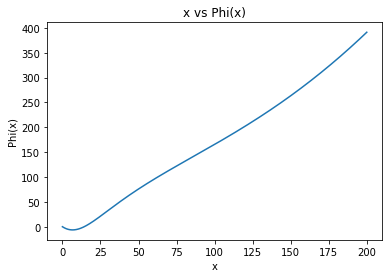

In [6]:
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('Phi(x)')
plt.title('x vs Phi(x)')